In [0]:
import scipy.io as sio
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import seaborn as sns; sns.set()
from matplotlib import pyplot as plt
from sklearn.linear_model import Lasso
from sklearn import svm
# import warnings
# from sklearn.exceptions import ConvergenceWarning
# with warnings.catch_warnings():
#     warnings.filterwarnings("ignore", category=ConvergenceWarning)
from warnings import filterwarnings
filterwarnings('ignore')

In [7]:
rData = sio.loadmat('rData.mat')['rData_all'].T
cData = sio.loadmat('cData.mat')['cData_all'].T
pd.DataFrame(cData).loc[0:5,143:154]
#Import matlab dataset as numpy array

,143,144,145,146,147,148,149,150,151,152,153,154
0,0.411517,0.431406,0.378644,0.326265,0.435594,0.424045,0.626107,0.590409,0.471129,0.545148,0.734818,0.506952
1,0.384324,0.386450,0.383972,0.333075,0.378663,0.389164,0.522445,0.452722,0.549478,0.461272,0.675375,0.592344
2,0.288997,0.386036,0.483220,0.568582,0.355898,0.473305,0.595595,0.662934,0.553141,0.629896,0.722298,0.629238
3,0.599658,0.616057,0.504062,0.513787,0.456793,0.507475,0.483751,0.623499,0.613844,0.603634,0.752736,0.834858
4,0.311936,0.320357,0.481130,0.360315,0.413058,0.434355,0.478393,0.311655,0.520014,0.535326,0.669884,0.550797
5,0.691524,0.434238,0.726088,0.765238,0.597834,0.726017,0.504343,0.409794,0.396342,0.614075,0.560330,0.579009


In [8]:
# Labels
pos = sio.loadmat('posPANSS.mat')['pos_all'].T
neg = sio.loadmat('negPANSS.mat')['neg_all'].T
gen = sio.loadmat('genPANSS.mat')['gen_all'].T
tot = sio.loadmat('totPANSS.mat')['tot_all'].T
score = np.hstack((pos,neg,gen,tot))
score.shape

(176, 4)

In [0]:
X_all = cData#np.hstack([rdata,rdata_m])
y_all = pos

Repeat  0 . max r2_score= 0.05137468313968996 , alpha= 0.09724757667205168
Repeat  1 . max r2_score= 0.027746014723339377 , alpha= 0.0012501717960549281
Repeat  2 . max r2_score= 0.035764553395537635 , alpha= 0.003414548873833601
Repeat  3 . max r2_score= 0.20555713340156678 , alpha= 0.0013978306065792132
Repeat  4 . max r2_score= -0.08044431451102363 , alpha= 0.005046965116884396
Repeat  5 . max r2_score= -0.20113540327306367 , alpha= 0.251188643150958
Repeat  6 . max r2_score= 0.1422782458949755 , alpha= 0.0018478497974222907
Repeat  7 . max r2_score= -0.041734033217163624 , alpha= 0.16994290206633514
Repeat  8 . max r2_score= -0.041973482525234695 , alpha= 0.1796989148532594
Repeat  9 . max r2_score= 0.13534836904384817 , alpha= 0.0024427486833971416


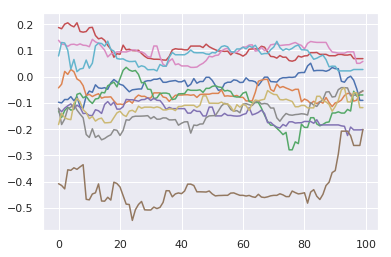

In [10]:
for repeat in range(10):
  X_train, X_test, y_train, y_test = train_test_split(
                    X_all, y_all, test_size=0.25, random_state=repeat)
  r2=[]
  r2_=[]
  ilist=[]
  fea = []
  pred=[]
  for i in np.logspace(-3, -0.6, 100):
      clf = Lasso(alpha=i)
      clf.fit(X_train, np.ravel(y_train))
      tmp = clf.coef_
      tmp1 = np.where(tmp>0)[0]
      fea.append(tmp1)
      X = X_train[:,tmp1]
      X_ = X_test[:,tmp1]
      svr = svm.SVR(kernel='linear')
      svr.fit(X, np.ravel(y_train))
      ilist.append(i)
      r2.append(svr.score(X_,np.ravel(y_test)))
      y_pred = svr.predict(X_)
      pred.append(y_pred)
  plt.plot(r2)
  a = np.where(r2==max(r2))[0]
  a = ilist[a[0]]
  print('Repeat ', repeat, '. max r2_score=',np.max(r2),', alpha=',a)

max r2_score= 0.01675668371075678 , alpha= 0.0552617001985409


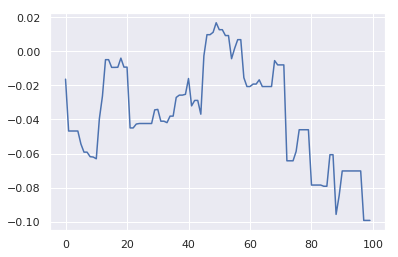

In [9]:
plt.plot(r2)
a = np.where(r2==max(r2))[0]
a = ilist[a[0]]
print('max r2_score=',np.max(r2),', alpha=',a)

In [53]:
a = np.where(r2==max(r2))[0]
a = ilist[a[0]]
print('max r2_score=',np.max(r2),', alpha=',a)

max r2_score= 0.07141317793782065 , alpha= 0.05153724655961634


In [57]:
clf = Lasso(alpha=a)
clf.fit(X_train, np.ravel(y_train))
tmp = clf.coef_
tmp1 = np.where(tmp>0)[0]
X = cData[:,tmp1]
print(X.shape,a)

svr = svm.SVR(kernel='linear')
svr_r2 = cross_val_score(svr, X, np.ravel(pos), cv=10)
print(svr_r2)
np.mean(svr_r2)

(176, 47) 0.05153724655961634


NameError: ignored